# Run Bias Analysis On Dataset Using SMclarify

In [1]:
!pip install -q smclarify==0.1

In [157]:
!pip list | grep smclarify

smclarify                          0.1


In [2]:
from smclarify.bias import report
from typing import Dict
from collections import defaultdict
import pandas as pd
import seaborn as sns

# Read Dataset From S3

In [1025]:
%store -r bias_data_s3_uri

In [1026]:
print(bias_data_s3_uri)

s3://sagemaker-us-east-1-231218423789/data/amazon_reviews_us_giftcards_software_videogames_balanced.csv


In [1029]:
!aws s3 cp $bias_data_s3_uri ./data/

download: s3://sagemaker-us-east-1-231218423789/data/amazon_reviews_us_giftcards_software_videogames_balanced.csv to data/amazon_reviews_us_giftcards_software_videogames_balanced.csv


In [1030]:
df_balanced = pd.read_csv('./data/amazon_reviews_us_giftcards_software_videogames_balanced.csv')
df_balanced.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
81035,US,32031441,RZGXDGABGXKNC,B007VTVRFA,402222185,SimCity - Limited Edition,Digital_Video_Games,1,2,2,N,Y,Full of Bugs,"30 Bucks for nothing, dont byu it!<br />Full o...",2013-04-29
81036,US,44964335,R1SDVONGUJOAN6,B005D9LZCU,82186241,Wondershare PDF Converter [Download],Digital_Software,1,3,3,N,N,Wondershare,I first thought this was great solution but I ...,2014-06-16
81037,US,13130172,R91P2AQF9YVHE,B009HBCU9W,194449368,TurboTax Deluxe Federal + E-File + State 2012,Digital_Software,1,0,0,N,Y,Only use it you are a U.S. citizen living in USA,Turbo didn't tell explicitly that you cannot e...,2014-10-04
81038,US,42150783,R1ST84188SAO81,B00T3FRWSQ,326971412,Trend Micro Premium Security 2015 - 5 Devices,Digital_Software,1,0,0,N,Y,This is for video and game downloads. I did ...,This is for video and game downloads. I did no...,2015-03-14
81039,US,15137766,R1RND8RGMX40WW,B002MUB0KU,418923037,Gutterball 2 [Download],Digital_Video_Games,1,0,0,N,Y,One Star,Bad game play,2014-11-08


# Read Dataset From Local Path

In [1032]:
# df = pd.read_csv('amazon_reviews_us_giftcards_software_videogames.csv')
# df.tail()

In [1031]:
# df_balanced = pd.read_csv('amazon_reviews_us_giftcards_software_videogames_balanced.csv')
# df_balanced.tail()

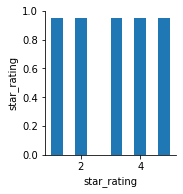

In [72]:
sns.pairplot(df_balanced[['product_category', 'star_rating']])

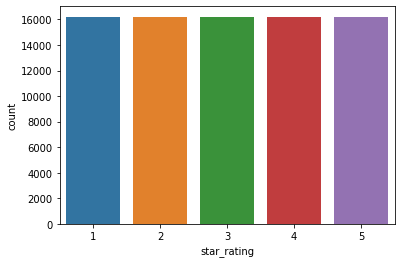

In [71]:
sns.countplot(df_balanced['star_rating'])

In [1033]:
df_balanced.shape

(81040, 15)

In [464]:
num = df_balanced.groupby(['product_category','star_rating'], sort=False).size().reset_index(name='Count')
print(num)

       product_category  star_rating  Count
0             Gift Card            5   8198
1   Digital_Video_Games            5   5133
2      Digital_Software            5   2877
3   Digital_Video_Games            4   7151
4      Digital_Software            4   5739
5             Gift Card            4   3318
6   Digital_Video_Games            3   8178
7      Digital_Software            3   5858
8             Gift Card            3   2172
9      Digital_Software            2   6890
10  Digital_Video_Games            2   7749
11            Gift Card            2   1569
12     Digital_Software            1   7192
13            Gift Card            1   1394
14  Digital_Video_Games            1   7622


## Balance Across Categories AND Star Ratings

In [981]:
df_giftcard5 = df_balanced.query('star_rating==5 and product_category=="Gift Card"')
df_giftcard5=df_giftcard5[:686]
df_giftcard5.shape

(686, 15)

In [982]:
df_giftcard4 = df_balanced.query('star_rating==4 and product_category=="Gift Card"')
df_giftcard4=df_giftcard4[:343]
df_giftcard4.shape

(343, 15)

In [983]:
df_giftcard3 = df_balanced.query('star_rating==3 and product_category=="Gift Card"')
df_giftcard3=df_giftcard3[:343]
df_giftcard3.shape

(343, 15)

In [984]:
df_giftcard2 = df_balanced.query('star_rating==2 and product_category=="Gift Card"')
df_giftcard2=df_giftcard2[:343]
df_giftcard2.shape

(343, 15)

In [985]:
df_giftcard1 = df_balanced.query('star_rating==1 and product_category=="Gift Card"')
df_giftcard1=df_giftcard1[:343]
df_giftcard1.shape

(343, 15)

In [986]:
df_videogames5 = df_balanced.query('star_rating==5 and product_category=="Digital_Video_Games"')
df_videogames5=df_videogames5[:343]
df_videogames5.shape

(343, 15)

In [987]:
df_videogames4 = df_balanced.query('star_rating==4 and product_category=="Digital_Video_Games"')
df_videogames4=df_videogames4[:343]
df_videogames4.shape

(343, 15)

In [988]:
df_videogames3 = df_balanced.query('star_rating==3 and product_category=="Digital_Video_Games"')
df_videogames3=df_videogames3[:343]
df_videogames3.shape

(343, 15)

In [989]:
df_videogames2 = df_balanced.query('star_rating==2 and product_category=="Digital_Video_Games"')
df_videogames2=df_videogames2[:343]
df_videogames2.shape

(343, 15)

In [990]:
df_videogames1 = df_balanced.query('star_rating==1 and product_category=="Digital_Video_Games"')
df_videogames1=df_videogames1[:343]
df_videogames1.shape

(343, 15)

In [991]:
df_software5 = df_balanced.query('star_rating==5 and product_category=="Digital_Software"')
df_software5=df_software5[:343]
df_software5.shape

(343, 15)

In [992]:
df_software4 = df_balanced.query('star_rating==4 and product_category=="Digital_Software"')
df_software4=df_software4[:343]
df_software4.shape

(343, 15)

In [993]:
df_software3 = df_balanced.query('star_rating==3 and product_category=="Digital_Software"')
df_software3=df_software3[:343]
df_software3.shape

(343, 15)

In [994]:
df_software2 = df_balanced.query('star_rating==2 and product_category=="Digital_Software"')
df_software2=df_software2[:343]
df_software2.shape

(343, 15)

In [995]:
df_software1 = df_balanced.query('star_rating==1 and product_category=="Digital_Software"')
df_software1=df_software1[:343]
df_software1.shape

(343, 15)

## Generate 4th Sample

In [996]:
df_bla5 = df_balanced.query('star_rating==5 and product_category=="Digital_Software"')
df_bla5['product_category'] = 'bla' # df_bla5['product_category'].str.replace('Digital_Software', 'bla')
df_bla5=df_bla5[:343]
df_bla5.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [997]:
df_bla4 = df_balanced.query('star_rating==4 and product_category=="Digital_Software"')
df_bla4['product_category'] = 'bla' # df_bla4['product_category'].str.replace('Digital_Software', 'bla')
df_bla4=df_bla4[:343]
df_bla4.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [998]:
df_bla3 = df_balanced.query('star_rating==3 and product_category=="Digital_Software"')
df_bla3['product_category'] = 'bla' # df_bla3['product_category'].str.replace('Digital_Software', 'bla')

df_bla3=df_bla3[:343]
df_bla3.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [999]:
df_bla2 = df_balanced.query('star_rating==2 and product_category=="Digital_Software"')
df_bla2['product_category'] = 'bla' # df_bla2['product_category'].str.replace('Digital_Software', 'bla')

df_bla2=df_bla2[:343]
df_bla2.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [1000]:
df_bla1 = df_balanced.query('star_rating==1 and product_category=="Digital_Software"')
df_bla1['product_category'] = 'bla' # df_bla1['product_category'].str.replace('Digital_Software', 'bla')
df_bla1=df_bla1[:343]
df_bla1.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

## Generate 5th Sample

In [1001]:
df_blah5 = df_balanced.query('star_rating==5 and product_category=="Digital_Software"')
df_blah5['product_category'] = 'blah' # df_bla5['product_category'].str.replace('Digital_Software', 'bla')
df_blah5=df_blah5[:343]
df_blah5.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [1002]:
df_blah4 = df_balanced.query('star_rating==4 and product_category=="Digital_Software"')
df_blah4['product_category'] = 'blah' # df_bla4['product_category'].str.replace('Digital_Software', 'bla')
df_blah4=df_blah4[:343]
df_blah4.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [1003]:
df_blah3 = df_balanced.query('star_rating==3 and product_category=="Digital_Software"')
df_blah3['product_category'] = 'bla' # df_bla3['product_category'].str.replace('Digital_Software', 'bla')

df_blah3=df_blah3[:343]
df_blah3.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [1004]:
df_blah2 = df_balanced.query('star_rating==2 and product_category=="Digital_Software"')
df_blah2['product_category'] = 'blah' # df_bla2['product_category'].str.replace('Digital_Software', 'bla')

df_blah2=df_blah2[:343]
df_blah2.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [1005]:
df_blah1 = df_balanced.query('star_rating==1 and product_category=="Digital_Software"')
df_blah1['product_category'] = 'blah' # df_bla1['product_category'].str.replace('Digital_Software', 'bla')
df_blah1=df_blah1[:343]
df_blah1.shape

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(343, 15)

In [1006]:
df_super_balanced = pd.concat([df_giftcard5, 
#                               df_giftcard4, 
                               df_giftcard3, 
#                               df_giftcard2, 
                               df_giftcard1, 
                               df_videogames5, 
#                               df_videogames4, 
                               df_videogames3, 
#                               df_videogames2, 
                               df_videogames1, 
                              df_software5, 
#                               df_software4, 
                               df_software3, 
#                               df_software2, 
                              df_software1,
#                               df_bla5,
#                                df_bla4,
#                                df_bla3,
#                                df_bla2,                               
#                               df_bla1,
#                               df_blah5,
#                                df_blah4,
#                                df_blah3,
#                                df_blah2,                               
#                               df_blah1                               
                              ], ignore_index=True, sort=False)
df_super_balanced.shape

(3430, 15)

## Calculate pre-training bias metrics

In [1023]:
# Measure bias for the marital attribute
facet_column = report.FacetColumn(name='product_category')
label_column = report.LabelColumn(name='star_rating', 
                                  data=df_super_balanced['star_rating'], 
                                  positive_label_values=[0] # this doesn't matter for class imbalance bias
                                 )
group_variable = df_super_balanced["marketplace"]


In [1024]:
report.bias_report(df_super_balanced, 
                   facet_column, 
                   label_column, 
                   stage_type=report.StageType.PRE_TRAINING, 
                   group_variable=group_variable
                  )

[{'value_or_threshold': 'Gift Card',
  'metrics': [{'name': 'CDDL',
    'description': 'Conditional Demographic Disparity in Labels (CDDL)',
    'value': 0.09523809523809523},
   {'name': 'CI', 'description': 'Class Imbalance (CI)', 'value': 0.2},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': 0.08333333333333331},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 0.004378830094856203},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.01737200037967128},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.08333333333333337},
   {'name': 'LP',
    'description': 'L-p Norm (LP)',
    'value': 0.11785113019775793},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.08333333333333334}]},
 {'value_or_threshold': 'Digital_Video_Games',
  'metrics': [{'name': 'CDDL',
    'description': 'Condit